In [22]:
from sentence_transformers import SentenceTransformer, util
import json
import matplotlib.pyplot as plt
import seaborn as sns

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [40]:
#Load the sentences
input = json.load(open('xml/sentences.json'))

#Access the relevant sentences
ackerSt = input['blackTarantula2']
srcSt = input['scoundrels']

#Test
#print(srcSt[0])

In [42]:
#Compute embeddings
ackerEmbeddings = model.encode(ackerSt, convert_to_tensor=True)
srcEmbeddings = model.encode(srcSt, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(ackerEmbeddings, srcEmbeddings)

In [41]:
# Print the first 5 of ackerSt to check if it contains full sentences
print(ackerSt[0:5])

["I'm born crazy in Barbican, four years after the defeat of the terrible Armada.", 'I decide immediately to do what I want: have adventures as a highwayman instead of gossiping with a bunch of women liars, fight with a quarterstaff, destroy every fucking needle they try to give me.', "I'm the bear lady, the leather coated eyes, the tough brawler-queen of the jewels of the slums.", "If I was a man, I'd go down with Colonel Downe's men upon the road; I'd sail to the Spanish main with black velvet over my left eye black velvet over my crotch.", 'Baiting, in the Bear Garden, is and will be my favorite sport.']


In [43]:
# Initialize a dictionary to store the data
data = {}

# Loop through Acker sentences
for i in range(len(ackerSt)):
    acker_sentence = ackerSt[i]
    source_sentence_scores = {}
    
    # Loop through source sentences
    for j in range(len(srcSt)):
        source_sentence = srcSt[j]
        score_str = cosine_scores[i][j]
        # Convert the score from string to float
        score = float(score_str)
        source_sentence_scores[source_sentence] = score
    
    data[acker_sentence] = source_sentence_scores

# Write the data to a JSON file
with open('xml/cosineScores.json', 'w') as json_file:
    json.dump(data, json_file, indent=2)

print("JSON data has been written to 'xml/cosineScores.json'")


# Outpute as csv
# output = open('xml/cosineScores.csv', 'w')
# output.write('ackerSentence,srcSentence,score\n')
# for i in range(len(ackerSt)):
#     for j in range(len(srcSt)):
#         output.write(ackerSt[i] + ',' + srcSt[j] + ',' + str(cosine_scores[i][j].item()) + '\n')
# output.close()


JSON data has been written to 'xml/cosineScores.json'


In [44]:
# Data Filtering
# Load the JSON data
with open('xml/cosineScores.json', 'r') as f:
    data = json.load(f)

# Set the threshold
threshold = 0.5

# Filter the data
filtered_data = {}

for acker_sentence, source_sentence_scores in data.items():
    filtered_srcSt_scores = {}

    for src_sentence, score in source_sentence_scores.items():
        if float(score) >= threshold:
            filtered_srcSt_scores[src_sentence] = float(score)

    if filtered_srcSt_scores:
        filtered_data[acker_sentence] = filtered_srcSt_scores

# Write the filtered data to a new JSON file
with open('xml/cosineScores_filtered.json', 'w') as f:
    json.dump(filtered_data, f, indent=2)

In [8]:
# Return the top 5 pairs
# top5 = []
# for i in range(len(ackerSt)):
#     for j in range(len(srcSt)):
#         top5.append((ackerSt[i], srcSt[j], cosine_scores[i][j].item()))
# top5.sort(key=lambda x: x[2], reverse=True)
# for i in range(5):
#     print(top5[i])



('The farmer demands to see my watch; the constable reaches into his pocket for the watch; no watch: one of my officers has stolen it.', "The farmer, anxious to acknowledge his property, demanded the constable to deliver the watch, that it might be sworn to in open court; and when the constable put his hand to his pocket the only piece of damning evidence had vanished, stolen by the nimble fingers of one of Moll's officers.", 0.7736738324165344)
("The notorious Moll Sack who emptied the vegetable Cromwell's pocket on the Mall.", "Thither came the unamiably notorious Mull Sack, who once emptied Cromwell's pocket on the Mall, and whose courage was as formidable as his rough-edged tongue.", 0.7501844167709351)
("I plead not guilty; I cry and sigh, oh, my watch and the farmer's watch are two different watches.", "Committed for trial, she demanded that the watch should be left in the constable's keeping, and, pleading not guilty when the sessions came round, insisted that her watch and the 

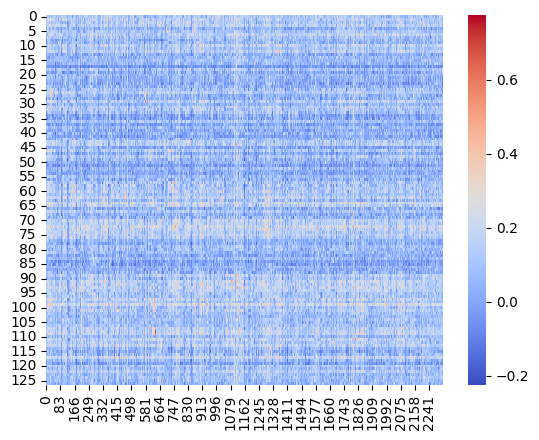

In [20]:
#Create a heatmap of the cosine similarity scores using seaborn
sns.heatmap(cosine_scores, cmap='coolwarm')

# #Normalised heatmap
# normalised_scores = (cosine_scores + 1) / 2

# #Create a heatmap of the normalised cosine similarity scores using seaborn
# sns.heatmap(normalised_scores, cmap='coolwarm')

#Show the plot
plt.show()